La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`tp3` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# (TP) Caractéristique d'une diode.

## Caractéristique statique d'une diode. (1h30)

### Manipulation

```{admonition} Manipulation
:class: tip
Réaliser le montage proposé dans votre protocole et tracer la caractéristique statique de la diode. Vous utiliserez la cellule de code ci-dessous pour tracer la caractéristique statique.

Les données sur les incertitudes de mesure associées aux mesures données par les multimètres Fluke sont disponibles [ici](http://www.cedriclacpatia.fr/pluginfile.php/1470/mod_resource/content/0/fluke_287_289.pdf) (connexion au site nécessaire).
```

### Tracé de la courbe

AttributeError: 'Line2D' object has no property 'legend'

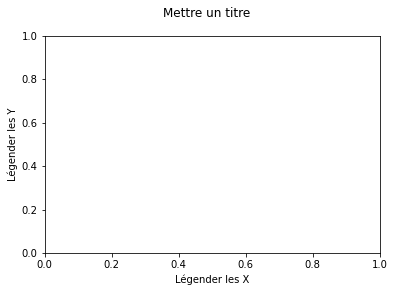

In [1]:
""" On importe pour vous les bibliothèques scientifiques utiles."""
import numpy as np
import matplotlib.pyplot as plt

"""Entrer ci-dessous les quatre vecteurs numpy correspondant :
- aux mesures de tensions
- aux mesures d'intensité
- aux estimations d'inceritude sur U (vous pouvez utiliser des variables intermédiaires et des opérations sur les vecteurs numpy)
- aux estimations d'inceritude sur I (vous pouvez utiliser des variables intermédiaires et des opérations sur les vecteurs numpy)
"""
u = np.array([])  # Valeurs de tensions
i = np.array([])  # Valeurs d'intensité

# Mettre ici vos intermédiaires de calcul pour les calculs d'incertitude.
# NOTE : IL EST POSSIBLE QUE VOUS UTILISIEZ DES FORMULES

uu = np.array([])  # Incertitudes sur les tensions (ce sera un vecteur numpy)
ui = np.array([])  # Incertitudes sur les intensités (ce sera un vecteur numpy)

"""Vous devez maintenant tracer le graphique. On rappelle :
- plt.subplots() crée la fenêtre graphique et  les axes (penser à utiliser les variables)
- penser à légender les abscisses et les ordonnées (avec les unités)
- Titrer votre graphique
- tracer les points de mesures non reliés avec les croix d'incertitude et légender votre courbe.
- afficher la courbe avec plt.show() à la fin
"""
f,ax = plt.subplots()
f.suptitle("Mettre un titre")
ax.set_xlabel("Légender les X")
ax.set_ylabel("Légender les Y")
ax.errorbar(u, i, xerr=uu, yerr=ui, legend="Légender la courbe", linestyle="",)
ax.grid()
ax.legend()
plt.show()

### Estimation de la tension seuil
On va estimer la tension seuil par une méthode (très approchée) : ce sera la moyenne des valeurs de la tension aux bornes de la diode quand l'intensité qui y circule est non nulle. On prendra comme critère __arbitraire__ d'intensité non nulle $i \geq \frac{E_0}{R_p}$ avec $E_0 = 0.5V$ (c'est un critère arbitraire qui a ses limites). La cellule ci-dessous permet d'estimer $U_d$. Essayer de comprendre le programme et modifier les lignes de code demandées pour faire fonctionner le code :

In [ ]:
def estim_ud(u, i, E0, RP):
  """Fonction qui renvoie une estimation de Ud en calculant la moyenne des tensions pour lesquelles
  i est supérieure ) E0/RP
  u  : vecteur numpy contenant les valeurs de tension
  i  : vecteur numpy contenant les valeurs d'intensité
  E0 : Valeur de E0 (flottant)
  RP : Valeur de RP (flottant)
  """
  imin = 0  # LIGNE A MODIFIER

  u_verif = []  # Liste qui contiendra les valeurs acceptées.
  N = 0  # LIGNE A MODIFIER
  for j in range(N):
    if i[j] >= imin:
      u.append([])  # LIGNE A MODIFIER

  u_verif = np.array(u_verif)  # Transformation en vecteur numpy pour calculer la moyenne simplement.
  ud = np.mean(u_verif)
  return ud

"""Ecrire ci-dessous l'instruction qui va enregistrer dans la variable ud_estim l'estimation de ud
avec la méthode précdente"""
ud_estim = 0  # LIGNE A MODIFIER


"""Ajout du modèle sur le graphique.
"""
f,ax = plt.subplots()
f.suptitle("Mettre un titre")
ax.set_xlabel("Légender les X")
ax.set_ylabel("Légender les Y")
ax.errorbar(u, i, xerr=uu, yerr=ui, legend="Légender la courbe", linestyle="", color="black")
ax.plot([-5, ud_estim, ud_estim], [0, 0, 5]legend="Légender la courbe", linestyle="-",color="red")
ax.grid()
ax.legend()
plt.show()


"""La commande ci-après permettra de sauvegarder le graphique dans un fichier image
(dans le répertoire où se trouve le notebook). Vous pourrez l'insérer dans votre compte-rendu.
"""
f.savefig("caracteristique_diode.png")


```{admonition} Exploitation
:class: tip
Vous devez maintenant analyser sur votre compte-rendu votre caractéristique statique (correspond-elle aux attentes ?) et l'estimation de votre tension seuil (il s'agit d'une estimation très grossière qui ne servira pas de manière quantitative par la suite, on ne cherchera donc pas à estimer l'incertitude sur $U_d$).
```

## Acquisition numérique d'un signal. (30 minutes)
Avant de chercher à obtenir la caractéristique dynamique d'une diode grâce à une carte d'acquisition, il est important de comprendre certains points clés d'une acquisition numérique en lien avec les paramètres d'acquisition. La partie sur la _synchronisation_ sera encore valable quand on utilise un oscilloscope.

### Réglages généraux.
* On commencera par brancher directement le GBF sur la carte d'acquisition FOXY. Sélectionner alors la voie à acquérir en ordonnée en fonction de vos branchements et l'horloge (base de temps) en abscisse.
* On va pour l'instant étudier un signal de fréquence 960Hz et d'amplitude 3V.
    * Comment choisir le calibre de la voie d'acquisition (Onglet calibre sous le mini-graphique à gauche lorsqu'on clic sur le symbole de la voie d'acquisition) ?
    * Comment choisir la durée d'acquisition (Lorsqu'on clic sur le symbole de l'horloge) ? _C'est un calcul __d'ordre de grandeur__, ne cherchez pas à faire un calcul exact de période du signal_.
* On remarque que d'autres réglages sont proposées :
    * Acquisition continue (ou unique si l'option est décochée)
    * Nombre de points
    * Onglet Synchronisation.

### Nombre de points et fréquence d'échantillonnage
_Pour l'instant, décocher l'option `Acquisition continue` et désactiver la Synchronisation (dans l'onglet du même nom) s'ils sont activés._

On va voir l'influence du nombre de points de sur le signal obtenu ou plus précisément de la __fréquence d'échantillonnage__ c'est-à-dire le nombre de points de mesure réalisés par seconde.

````{admonition} Influence de la fréquence d'échantillonnage
1. Pensez à régler le GBF pour qu'il délivre la tension voulue (_ne pas oublier d'activer le GBF avec le bouton `ON`_)
2. Comment obtenir la fréquence d'échantillonnage à partir de la durée d'acquisition et du nombre de points de mesure ? En déduire le nombre de points nécessaire pour obtenir une fréquence d'échantillonnage de 100kHz puis de 10kHz.
3. Régler le nombre de points adéquats puis observer le signal acquis pour les deux fréquence d'échantillonnage précédentes. Mesurer alors (rapidement) la période du signal et la comparer à la valeur attendue.
4. Choisir maintenant 100 points de mesure et modifier la durée d'acquisition pour avoir une fréquence d'échantillonnage de 1kHz. Observer le signal et mesurer la fréquence. Commenter.

```{margin}
Un clic-droit sur le graphique permet d'obtenir un menu où vous pouvez choisir de mesurer des valeurs.
```
````

````{admonition} Critère de Shannon-Nyqvist
:class: important
Lorsqu'on fait l'acquisition d'un signal dont la fréquence maximale $f_{\max}$ (dans son spectre), il est nécessaire que la fréquence d'échantillonnage $f_e$ soit __au moins deux fois supérieure  à $f_{\max}$ :

$$
f_e > 2 f_{\max}
$$

En pratique, __on se placera à une fréquence d'échantillonnage bien plus grande que la limite du critère de Shannon-Nyqvist__ pour obtenir un visuel acceptable.
```{margin}
* Les consoles FOXY en TP sont limités à 16000 points et une fréquence d'échantillonage de 10MHz. Ce sera suffisant pour nous.
* Un oscilloscope règle lui même sa fréquence d'échantillonnage en fonction de ses limites. On ne peut jouer que sur la durée d'acquisition pour éviter d'acquérir sur un temps trop long.
```
````

### Acquisition unique ou continue ?
```{admonition} Question
:class: tip
* Dans quel cas une acquisition unique est-elle obligatoire ?
* Dans quel cas une acquisition continue est-elle préférable voire obligatoire ?
* Revenir à une fréquence d'échantillonage acceptable et activer l'acquisition continue. Quel problème rencontre-t-on. La __synchronisation__ va permettre de résoudre ce problème.
```

### Synchronisation
Utiliser le second GBF à disposition pour délivrée un signal sinusoïdal de fréquence 1960Hz et d'amplitude 3V et le brancher sur une autre voie de la carte d'acquisition.

````{admonition} Manipulation
:class: tip
1. Activer l'acquisition continue et lancer l'acquistion des deux signaux simultanément (vérifier que la durée d'acquisition et la fréquence d'échantillonnage permettent de visualiser les deux signaux correctement).
2. Activer la synchronisation (Onglet synchronisation dans le menu associé à l'horloge) et choisir :
    1. Une synchronisation sur la voie du premier GBF avec une pente montante et une tension de 1V.
    2. Une synchronisation sur la voie du premier GBF avec une pente descendante et une tension de 1V.
    3. Une synchronisation sur la voie du premier GBF avec une pente montante et une tension de 4V.
    4. Une synchronisation sur la voie du second GBF avec une pente montante et une tension de 1V.
3. Commenter ce que vous observez à chaque fois et en déduire une explication du rôle :
    1. De la voie de synchronisation
    2. Du niveau de synchronisation
    3. De la pente de synchronisation
```{margin}
Avec un oscilloscope, la synchronisation est toujours nécessaire. Souvent les réglages automatiques suffisent mais si le signal n'est pas stable, il faut penser à la régler.
```
````

## Caractéristique dynamique d'une diode (1h)

### Utilisation de FOXY

#### Manipulation
Réaliser le montage proposé dans votre protocole pour visualiser la caractéristique dynamique de la diode. Observer alors les caractéristiques de la diode pour les tensions suivantes :
1. Un signal sinusoïdale de fréquence 1kHz, d’amplitude 10V et de valeur moyenne nulle
2. Un signal sinusoïdale de fréquence 20kHz, d’amplitude 3V et de valeur moyenne 1V
3. Un signal triangulaire de fréquence 3kHz, d’amplitude 3V, de valeur basse -2V
4. Un signal créneau de fréquence 500Hz, d’amplitude 8V et de valeur moyenne nulle
5. Un signal créneau de fréquence 30kHz, de valeur basse 0V et de valeur haute 6V.

_La meilleur manière d'enregister les tracés pour les mettre dans votre compte-rendu est une capture d'écran._

```{attention}
On pensera bien à réfléchir aux paramètres d'acquisition __avant de lancer l'acquisition__.
```

#### Exploitation
````{admonition} Exploitation
Comparer les caractéristiques dynamiques à la caractéristique statique et préciser dans quels cas on pourra analyser le comportement de la diode grâce à sa caractéristique statique, même quand le régime est variable.

```{margin}
Ce n'est pas vrai pour tous les dipôles. La caractéristiques dynamique d'un condensateur sera toujours très différente de sa caractéristique statique.
```
````

### Utilisation d'un oscilloscope
On a vu que les bornes des voies d'acquisition reliées à la Terre, combinées à la borne du GBF reliée à la Terre posait des problèmes de court-circuit. Nous allons introduire un dispositif permettant d'isoler les bornes du GBF du reste du circuit : le __transformateur d'isolement__.

#### Principe et schématisation.
Un transformateur est un _quadripole_ composé de deux bobines qui influent l'une sur l'autre. Le schéma est donné ci-après

```{figure} ./images/transfo_schema.png
:name: label_image
:align: center
Schéma d'un transformateur
``` 

Deux bornes sont reliées à un circuit d'entrée (circuit primaire, gauche sur le schéma) qui reçoit une tension $u_1$. Par un phénomène d'induction qui sera étudié en fin d'année, il nait alors une tension $u_2$ aux bornes de la seconde bobine (circuit secondaire, droite sur le schéma) qui va donc alimenter le second circuit. Le rapport $m = \frac{u_2}{u_1}$ est appelé __rapport de transformation en tension__. Il existe des transformateurs réhausseur (augmentation de tension, en sortie des centrale électrique), abaisseurs (diminution de tension, dans les adaptateurs (d'ordinateur par exemple)).

Dans les transformateurs, les deux bobines __ne sont pas reliées électriquement__ donc les bornes du circuit primaire ne sont pas à priori reliées aux bornes du circuit secondaire. Donc si il y a un GBF avec une borne reliées à la Terre dans le circuit primaire, __il n'impose pas de borne de Terre dans le circuit secondaire__ : on peut la placer où on veut. On parle de rôle __d'isolement__ du transformateur.

Certains transformateurs ont un rôle uniquement d'isolement (d'où le nom de __transformateur d'isolement__) et possède alors un rapport $m=1$. C'est le cas du transformateur utilisé en TP.

```{margin}
Vous observez peut-être un rapport légèrement différent de 1 car, comme nous le verront en fin d'année, $m$ dépend de la fréquence des signaux.
```

#### Contraintes d'utilisation
Le phénomène d'induction n'a lieu que sous certaines hypothèses qu'on va illustrer par une manipulation simple (prendre $R_p = 1k\Omega$).

````{admonition} Manipulation
:class: tip
Réaliser le montage ci-dessous.
```{figure} ./images/transfo_etude.jpg
:name: transfo_etude
:align: center
Etude du transformateur
```
1. Mesurer le rapport de transformation en tension pour une tension d'entrée sinusoïdale de fréquence 1kHz puis pour une tension continue. _On utilisera l'oscilloscope dans les deux cas et on reproduira le schéma du montage dans le compte-rendu en précisant les branchements de l'oscilloscope._
2. Expliquer quelle contrainte doit avoir le signal d'entrée pour que le transformateur fonctionne.
````

#### Rôle d'isolement
On va donc utiliser le rôle d'isolement du transformateur pour pouvoir brancher la Terre où l'on veut dans le secondaire et donc observer les tensions aux bornes de la résistances et de la diode dans le circuit suivant.

```{figure} ./images/transfo_diode.jpg
:name: transfo_diode
:align: center
Etude de la caractéristique dynamique d'une diode.
```

````{admonition} Manipulation
:class: tip
1. Réaliser le montage précédent.

* Le __Mode XY__ permet d'observer la voie 2 en fonction de la voie 1.
* Il est possible de multiplier le signal mesurée par $-1$ : (Dans le menu de la voie à modifier)

2. Utiliser ces deux informations pour  observer la caractéristique de la diode pour les différents signaux déjà étudiés précédemment. Représenter dans votre compte-rendu l'allure des courbe observées et préciser pourquoi il est nécessaire de multiplier l'un des signaux par $-1$.
````

## Impédance de sortie du GBF (1h)
Cette partie est complètement indépendante des précédente. Elle préparer aux raisonnements sur les associations d'impédance du prochain TP.

````{admonition} Manipulation
:class: tip
1. Observer sur le GBF (ou ses menus) l'impédance de sortie du GBF. On se propose de la mesurer expérimentalement.
````

### Influence de l'impédance de sortie.

````{admonition} Manipulation
:class: tip
1. Brancher aux bornes du GBF une résistances $R$ du même ordre de grandeur que la résistance de sortie $R_S$. Délivrer une tension continue. Mesurer la tension aux bornes du GBF. Qu'observe-t-on ? Expliquer théoriquement pourquoi on obtient ce problème ?
2. Reprendre la même manipulation avec une tension sinusoïdale.
````

```{important} Influence de l'impédance de sortie
On retiendra que lorsque __l'impédance de sortie du GBF n'est plus négligeable__, le signal qu'il délivre __n'est plus le signal demandé par l'utilisateur__. C'est une façon de repérer si l'impédance de sorti du GBF n'est plus négligeable.

Quelle solution pour la rendre négligeable ?
```

### Mesure de l'impédance de sortie. Point de fonctionnement

````{admonition} Manipulation
:class: tip
1. Reprendre le montage précédent avec une tension continue et mesurer (aux multimètres) la tension aux bornes du GBF et l'intensité qui circule dans le circuit. Estimer l'incertitude sur ces deux mesures.
2. La tension de commande est, dans une modélisation de Thévenin du GBF, la tension de la source idéale de tension. En déduire une méthode pour calculer $R_S$ grâce aux mesures précédentes. Utiliser la cellule ci-dessous pour estimer $R_S$ et son incertitude-type grâce à une méthode de Monte-Carlo.
````

In [ ]:
"""On importe pour vous la bibliothèque numpy.random"""
import numpy.random as rd

N = 1000000  # Ce sera le nombre de simulations à réaliser.

"""
Créer les vecteurs numpy correspondant aux distributions associées aux mesures de U et de I aux multimètres.
Sans plus d'information, on considèrera que les distribution associées aux valeurs données par le multimètre
sont des distributions uniformes (fonction uniform(start, stop, N) dans numpy.random).
"""

"""En déduire dans la variable RS les N valeurs simulées de la résistance de sortie."""


"""Calculer puis afficher la moyenne et l'écart-type du vecteur On rappelle :
mean(vec) de la bibliothèque numpy pour calculer la moyenne
std(vec, ddof=1) de la bibliothèque numpy pour calculer l'écart-type
"""



"""Calculer l'écart normalisé avec la valeur constructeur (qu'on supposera connu à $1 Ohm$)"""


````{admonition} Compte-rendu
:class: tip
1. Présenter dans votre compte-rendu le protocole de cette manipulation.
2. Présenter les résultats de mesure (U, I et $R_S$) avec leurs incertitudes de mesure.
3. Exploiter l'écart normalisé pour discuter de la compatibilité avec la valeur donnée par le constructeur.
````